<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Data Preprocessing</font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.8</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, we take the number of transistor count in each processor by year of its introduction and check with the simple linear regression model whether actual data support the so-called "Moore's law". We also check for the presence of a possible outlier. <br>
**Note**: *The original dataset can be found at https://en.wikipedia.org/wiki/Transistor_count. Dataset was converted to csv file with LibreOffice Calc.*

### Table of contents
1. [Reading and converting the data](#ReadingData)
2. [Scatter plot of observations](#ScatterPlot)
3. [Identifying the outlier](#OutlierIdentification)
4. [Checking Moore's law](#CheckMooreLaw)

## 1. Reading and converting the data <a name="ReadingData"></a>

First, import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import os
%matplotlib inline

Read the TransistorCount.csv into pandas dataframe and remove some columns not important for our analysis. Extract the input and output values from the pandas dataframe into vector $\mathbf{x}$ and $\mathbf{y}$. Also, extract the number of observations available in the data sets.

In [2]:
data = pd.read_csv(os.path.join('data','TransistorCount.csv'))
data=data.drop(['Designer', 'Area', 'Process'], axis=1)
print("Transistor count in processors by year:")
print("=======================================\n",data.to_string(index=False))

Transistor count in processors by year:
  Date of introduction  Transistor count                       Processor
                 1971              2300                      Intel 4004
                 1972              3500                      Intel 8008
                 1974              8000                        TMS 1000
                 1974              4100                   Motorola 6800
                 1974              4500                      Intel 8080
                 1974              5000                        RCA 1802
                 1975              3510             MOS Technology 6502
                 1976              6500                      Intel 8085
                 1976              8500                       Zilog Z80
                 1978              9000                   Motorola 6809
                 1978             29000                      Intel 8086
                 1979             29000                      Intel 8088
                 1979  

In [3]:
x_=np.array(data["Date of introduction"])[:,np.newaxis]
y_=np.array(data["Transistor count"])[:,np.newaxis]
N,_=data.shape
print("Number of observations:",N)

Number of observations: 120


There are 120 observations in the dataset. Although this might be considered as still a small dataset compared to the big databases available nowadays, the size is enough to be confident in our result as represents more or less the population of the microprocessors from the last five decades.

## 2. Scatter plot of observations <a name="ScatterPlot"></a>

Let's use the scikit-learn library directly and try to fit a simple linear regression on the dataset.

In [4]:
linregr=LinearRegression()
result=linregr.fit(x_,y_)

Make the scatter plot of the observations and plot the estimated regression line.

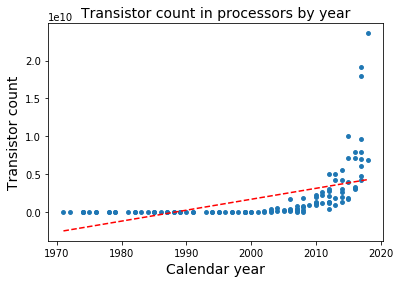

In [5]:
plt.scatter(x_,y_,s=15)
plt.plot(x_,linregr.predict(x_),'--r')
plt.xlabel('Calendar year',fontsize=14)
plt.ylabel('Transistor count',fontsize=14)
plt.title('Transistor count in processors by year',fontsize=14)
plt.show()

As can be observed, the linear regression model is not a good fit to our data. We can also calculate the coefficient of determination.

In [6]:
print("R-squared:",linregr.score(x_,y_))

R-squared: 0.27087058819019494


Based on the graph, there should be no surprise that the R-squared value is so low, and only 27% of the variation in the transistor count is explained by the year of introduction. <br>
However, we can observe from the scatter plot that the data points are not following a linear trend but rather an exponential trend. What about a scatter plot with a logarithmic scale for the output $y$?

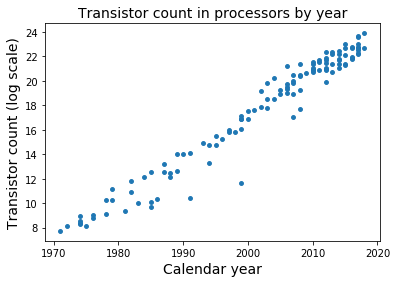

In [7]:
plt.scatter(x_,np.log(y_),s=15)
plt.xlabel('Calendar year',fontsize=14)
plt.ylabel('Transistor count (log scale)',fontsize=14)
plt.title('Transistor count in processors by year',fontsize=14)
plt.show()

And indeed, the data points now follow a linear trend. Thus, the first scatter plot of the observations provided a hint about the relation between $x$ and $y$, and after taking the scatter plot with the logarithm of $y$, we find out the linear relation between $x$ and $\log y$. So let's try to fit a simple linear regression after preprocessing the output $y$, i.e. taking the logarithm of $y$.

In [8]:
ylog_=np.log(y_)
result=linregr.fit(x_,ylog_)

Make the scatter plot of the scaled data set together with the estimated linear regression line.

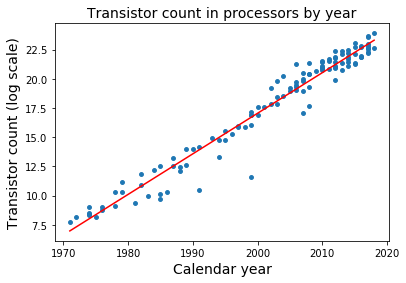

In [9]:
plt.scatter(x_,ylog_,s=15)
plt.plot(x_,linregr.predict(x_),'r')
plt.xlabel('Calendar year',fontsize=14)
plt.ylabel('Transistor count (log scale)',fontsize=14)
plt.title('Transistor count in processors by year',fontsize=14)
plt.show()

Let's calculate the coefficient of determination again:

In [10]:
print("R-squared:",linregr.score(x_,ylog_))

R-squared: 0.9583221406461232


That is quite impressive, almost 96% percent of the variation of logarithm $y$ is explained by the variation in the year of introduction.

## 3. Identifying the outlier <a name="OutlierIdentification"></a>

Let's make the histogram plot for the residuals, as well as the probability plot for normal distribution.

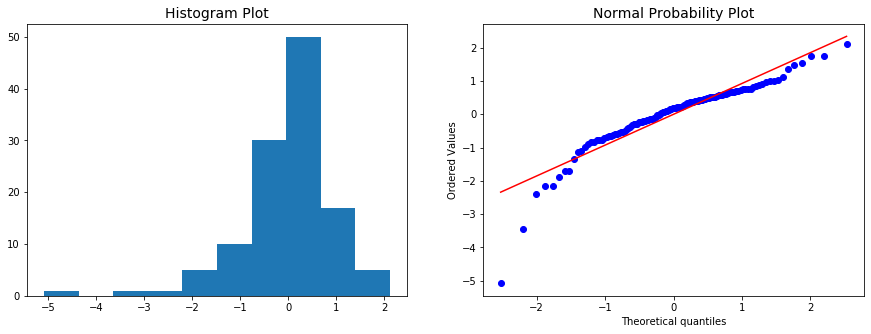

In [11]:
resid_=ylog_-linregr.predict(x_)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(resid_)
ax[0].set_title("Histogram Plot",fontsize=14)
result=stats.probplot(np.ravel(resid_), plot=ax[1])
ax[1].set_title("Normal Probability Plot",fontsize=14)
plt.show()

It seems that there is an outlier. Looking at the scatter plot of the preprocessed data and the estimated regression line, we suspect that the outlier might be the observation having the maximum negative residual. Let's find the index of the observation with maximum negative residual (the minimum of the residuals) and see which processor corresponds to that.

In [12]:
idx=np.argmin(resid_)
print(data.iloc[idx])

Date of introduction         1999
Transistor count           111000
Processor               ARM 9TDMI
Name: 40, dtype: object


We can check if this outlier is leverage and also an influential point. First, plot the mean of the input.

In [13]:
print("Mean of x:",x_.mean())

Mean of x: 2001.5416666666667


Thus, the outlier does not have high leverage. In fact, the outlier $x$ value almost matches the mean of the input. Thus, the outlier is only in $y$ direction and removing it will only increase the R-squared value, but does not influence the parameters of the linear model.

Let's create a new dataset that does not contain the outlier.

In [14]:
x1_=np.delete(x_,idx,axis=0)
ylog1_=np.delete(ylog_,idx,axis=0)
N1,_=x1_.shape
print("Number of observations in the reduced data set is:",N1)

Number of observations in the reduced data set is: 119


Fit the linear regression model on the reduced dataset and make the scatter plot of the reduced dataset together with the new estimated regression line.

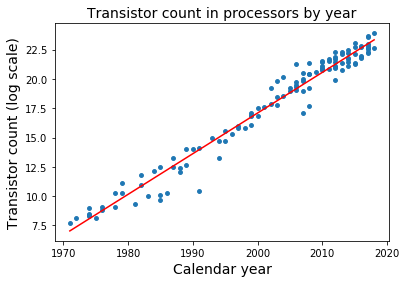

In [15]:
result=linregr.fit(x1_,ylog1_)
plt.scatter(x1_,ylog1_,s=15)
plt.plot(x1_,linregr.predict(x1_),'r')
plt.xlabel('Calendar year',fontsize=14)
plt.ylabel('Transistor count (log scale)',fontsize=14)
plt.title('Transistor count in processors by year',fontsize=14)
plt.show()

Finally, let's calculate the coefficient of determination with the model fitted on the reduced data set (with outlier removed).

In [16]:
print("R-squared:",linregr.score(x1_,ylog1_))

R-squared: 0.9674301717880263


As we expected, the R-squared value slightly increased. Now, almost 97% of the variation in the logarithm of transistor count is explained by the change in the year of introduction. That is very impressive! The remaining 3% of unexplained variation in $\log y$ is due to engineering decisions during processor design. That also means engineers, in general, utilized almost the maximum available number of transistors provided by the actual silicon technology during processor designs.

There is a problem though with the above graph. The human mind can hardly interpret the numbers like exp(1),exp(2),exp(3), etc. So, for more readability, we should use logarithm 10 instead.

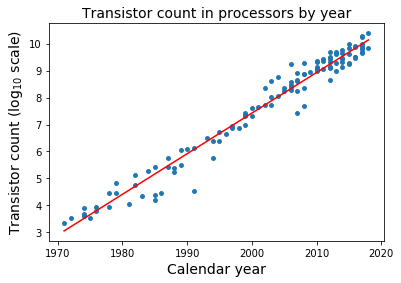

In [17]:
ylog_=np.log10(y_)
x1_=np.delete(x_,idx,axis=0)
ylog1_=np.delete(ylog_,idx,axis=0)
N1,_=x1_.shape
result=linregr.fit(x1_,ylog1_)
plt.scatter(x1_,ylog1_,s=15)
plt.plot(x1_,linregr.predict(x1_),'r')
plt.xlabel('Calendar year',fontsize=14)
plt.ylabel('Transistor count ($\log_{10}$ scale)',fontsize=14)
plt.title('Transistor count in processors by year',fontsize=14)
plt.show()

## 4. Checking Moore's law <a name="CheckMooreLaw"></a>

Now, that we have a good simple linear regression model fitted on the (reduced) dataset, let's check whether the so-called Moore's law is supported by the actual data from the last five decades. Moore's law is the observation that the number of transistors in a dense integrated circuit (like microprocessor) doubles every two years. The observation is named after Gordon Moore, the co-founder of Fairchild Semiconductor and Intel, whose 1965 paper described a doubling of the number of transistors per integrated circuit every two years. <br>
Knowing that the slope $w$ defines the change in $\log y$ for a unit change in $x$ (e.i. $w=\frac{\Delta \log y}{\Delta x}$), and assuming that the number of transistors is doubled we can use the formula $T=\frac{\log 2}{w}$ to find out the required change in $x$.

In [18]:
print("Transistor count doubled in every {0:.3f} years".format(np.log(2)/linregr.coef_[0][0]))

Transistor count doubled in every 4.604 years


And indeed, Moore's law is supported by the actual data based on the number of transistors in processors in the last five decades. <br>
Although we are aware of the previous example, that predicting outside of the observed data points has great uncertainty, let's see what would be the transistor count in processors by 2030.

In [19]:
print("Transistor count in 2030 will be {0:.3f}".format(np.exp(linregr.predict(np.array([2030]).reshape(-1, 1)))[0,0]))

Transistor count in 2030 will be 153012.813


That is a huge number, namely more than 867 billion transistors (close to one trillion)!

As a conclusion, preprocessing the data (in this case making the logarithm of $y$) could help us using simple linear regression even in non-linear cases.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).